In [1]:
import numpy as np
import sympy
from sympy import I, latex
from IPython.display import display, Latex
import matplotlib.pyplot as plt

# Занятие 9
# Алгебра
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [3]:
z1 = 5*sympy.sqrt(3) + 5*I
z2 = -3 + 3*I
z3 = -1 + I
z4 = I
z5 = sympy.S(12)/13 + sympy.S(5)/13*I
res = (sympy.expand_complex(z1*z2), sympy.expand_complex((z2-5*z3)**6), sympy.expand_complex((z4/z3)**(1/2)), sympy.expand_complex((z1**2 + z3)/(13*z5 - 2*z2)))
display(Latex((r'\text{{Комплексные числа }} ' +\
'{}\quad ' * len(res)).format(*map(latex, res))))

<IPython.core.display.Latex object>

### Задание  2.
Вычисления Примера 1 проделать для мнимой единицы из Python (использовать встроенную функцию complex).

In [ ]:
z1 = complex(5*sympy.sqrt(3), 5)
z2 = complex(-3, 3)
z3 = complex(-1, 1)
z4 = complex(0, 1)
z5 = complex(sympy.S(12)/13, sympy.S(5)/13)
res1 = (z1*z2, (z2-5*z3)**6, (z4/z3)**(1/2), (z1**2 + z3)/(13*z5 - 2*z2))
display(Latex((r'\text{{Комплексные числа }} ' +\
'{}\quad ' * len(res1)).format(*map(latex, res1))))

<IPython.core.display.Latex object>

### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $A_k$, где $k$  - номер корня.

(-1.5, 1.5)

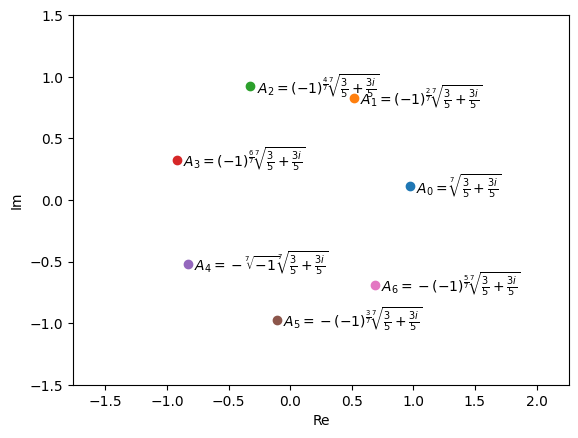

In [ ]:
n = 7
roots = [sympy.root(sympy.S(3)/5 + sympy.S(3)/5*I, n, k) for k in range(n)]
for x, y, k_complex_z in zip(map(sympy.re, roots),
                              map(sympy.im, roots),
                              enumerate(roots)):
    plt.scatter(x, y)
    k, complex_z = k_complex_z
    plt.annotate(f'$A_{k} = {sympy.latex(complex_z)}$',
            xy=(x, y),
            xytext=(x + 0.05, y - 0.05))
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-4, 4.5)
plt.ylim(-1.5, 1.5)

### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

In [10]:
z4 = -1 * (3 ** sympy.S.Half) + 3 * I
r = sympy.functions.Abs(z4)
phi = sympy.functions.arg(z4)
z4_trig = r * (sympy.cos(phi) + sympy.sin(phi) * I)
display(z4_trig)
z4s = sympy.conjugate(z4)
z4_con = sympy.conjugate(z4)

real = sympy.re(z4_con)
im = sympy.im(z4_con)

z4s_exp = sympy.functions.Abs(z4s) * sympy.E**(I * sympy.functions.arg(z4))
display(z4s_exp)

2*sqrt(3)*(-1/2 + sqrt(3)*I/2)

2*sqrt(3)*exp(2*I*pi/3)

-sqrt(3) - 3*I

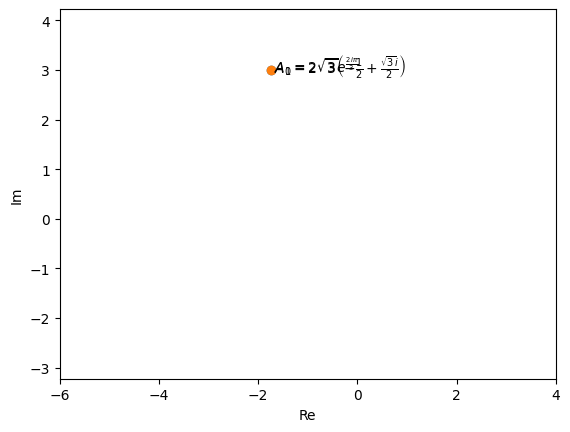

In [9]:
roots = [z4_trig, z4s_exp]
for x, y, k_complex_z in zip(map(sympy.re, roots),
                              map(sympy.im, roots),
                              enumerate(roots)):
    plt.scatter(x, y,)
    k, complex_z = k_complex_z
    plt.annotate(f'$A_{k} = {sympy.latex(complex_z)}$',
            xy=(x, y),
            xytext=(x + 0.05, y - 0.05))
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-6, 4)
plt.ylim(-4, 5)
plt.show()

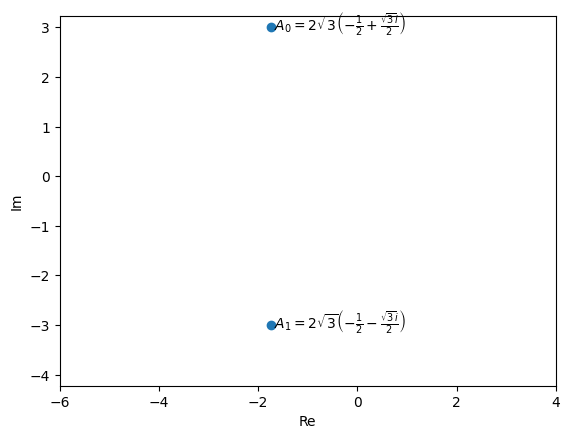

In [22]:
x = sympy.re(z4)
y = sympy.im(z4)
plt.scatter((x, real), (y, im))
plt.annotate(f'$A_{0} = {sympy.latex(sympy.functions.Abs(z4)*(sympy.cos(phi) + I*sympy.sin(phi)))}$',
            xy=(x, y),
            xytext=(x + 0.05, y - 0.05))
plt.annotate(f'$A_{1} = {sympy.latex(sympy.functions.Abs(z4)*(sympy.cos(phi) - I*sympy.sin(phi)))}$',
            xy=(real, im),
            xytext=(real + 0.05, im - 0.05))
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-6, 4)
plt.ylim(-6, 5)
plt.show()

#### Задание  5*.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел.

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + \sin(\varphi))$ использовать формулу
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$,
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n$.

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность в формате float модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и преобразовывать результат в формат float).

In [ ]:
n = 4
z_exp = 5*sympy.E**(I*sympy.pi/8)
r = sympy.functions.Abs(z_exp)
phi = sympy.functions.arg(z_exp)
z_trig = r * (sympy.cos(phi) + sympy.sin(phi) * I)
display(z_trig)
roots = [sympy.root(z_exp, n, k) for k in range(n)]

5/sqrt((1/2 - sqrt(2)/4)/(sqrt(2)/4 + 1/2) + 1) + 5*I*sqrt(1/2 - sqrt(2)/4)/(sqrt(sqrt(2)/4 + 1/2)*sqrt((1/2 - sqrt(2)/4)/(sqrt(2)/4 + 1/2) + 1))

In [ ]:
display("Тригонометрический вид:")
roots_trig = list(map(lambda x: sympy.Abs(x) * (sympy.cos(sympy.arg(x)) + sympy.sin(sympy.arg(x)) * I), roots))
display(*map(Latex, map(latex, roots_trig)))

'Тригонометрический вид:'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
display("алгебраический вид")
roots_alg = list(map(lambda x: sympy.re(x) + sympy.im(x)*I, roots))
display(*map(Latex, map(latex, roots_alg)))

'алгебраический вид'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
for i in range(len(roots)):
  print(f"разность корней #{i}: {float(abs(complex(roots_trig[i]-roots_alg[i])))}")

разность корней #0: 3.721932670055894e-127
разность корней #1: 3.721932670055894e-127
разность корней #2: 3.721932670055894e-127
разность корней #3: 3.721932670055894e-127


#### Задание  6*.
Считать из файла "complex_numbers.xlsx" комплексные числа (откройте файл, обратите внимание на подписи строк и столбцов, имя листа).
Вывести на экран  считанные числа в алгебраической  форме, их модули и аргументы. Дописать в файл листы "abs" и "arg" с названиями строк в виде алгебраической формы комплексного числа (например, $2-3i$) и столбцом "abs" и "arg" соответсвенно со значениями модулей и аргументов чисел, округленными до 2 знаков после запятой. Округлять можно, например, с помощью round из Python.

**Указание:** построить по считанным из файла значениям вещественной и мнимой части комплексные числа sympy, вычислить приближенно их модули и аргументы средствами sympy, затем округлить.

In [ ]:
from google.colab import files
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

Saving complex_numbers.xlsx to complex_numbers.xlsx
Загружен файл complex_numbers.xlsx


In [ ]:
import pandas as pd
Z = pd.read_excel(file_name, sheet_name='a+ib')
arr = [Z["re"][i] + Z["im"][i]*I for i in range(len(Z["re"]))]
display(*map(Latex, map(latex, arr)))
Abs = [round(float(sympy.Abs(i)), 2) for i in arr]
Arg = [round(float(sympy.arg(i)), 2) for i in arr]

abs_df = pd.DataFrame({"number":arr,"abs":Abs})
arg_df = pd.DataFrame({"number":arr,"arg":Arg})

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
with pd.ExcelWriter("complex_numbers.xlsx", mode = "a") as writer:
      abs_df.to_excel(writer, sheet_name="abs",  index=False)
      arg_df.to_excel(writer, sheet_name="arg",  index=False)

In [ ]:
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Индивидуальное задание.
Составить уравнение 3 степени с переменной $z$, корнями которого являются числа $z_1$, $z_2$ и $z_3$, вывести уравнение на экран (скобки должны быть раскрыты!).

Решить полученное уравнение с использованием sympy.roots.
Корни уравнения вывести на экран в алгебраической форме.

Преобразовать **полученные** корни уравнения в комплексные числа Python (не sympy!), вывести на экран комплексно-сопряженные к ним числа.

Затем вывести на экран на отдельной строчке модули всех чисел и на отдельной строчке аргументы, все числа округлить до 3 знаков после запятой, т.е. не более 3 знаков после запятой.


In [ ]:
# Вариант 21
z1 = 7 + 8*I
z2 = 3 + 2*I
z3 = -7 * I
z = sympy.Symbol("z")
eq = sympy.expand((z-z1)*(z-z2)*(z-z3))
roots = list(sympy.roots(eq).keys())

In [ ]:
print("Алгебраическая форма:")
display(*map(Latex, map(latex, roots)))

Алгебраическая форма:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
roots1 = [complex(sympy.re(i), sympy.im(i)) for i in roots]
roots1_con = [i.conjugate() for i in roots1]
print(f"Корни: {roots1}")
print(f"Сопряженные корни: {roots1_con}")

Корни: [(7+8j), (3+2j), -7j]
Сопряженные корни: [(7-8j), (3-2j), 7j]


In [ ]:
abs_arr = [round(abs(i), 3) for i in roots]
arg_arr = [round(sympy.acos(roots1[i].real/abs_arr[i]), 3) for i in range(len(roots1))]

print(f"Модули: {abs_arr}")
print(f"Аргументы: {arg_arr}")

Модули: [10.630, 3.606, 7]
Аргументы: [0.852, 0.588, 1.571]
